In [12]:
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

## <center>Textual Analysis of SEC Filings</center>
### <center>(STAD95 Project Report)</center>

## Summary
Leave for last
    
## Introduction
Public-traded companies file a comprehensive annual financial report(10K) to discuss its financial performance as required by the U.S Securities and Exchange Commision(SEC). These reports can contain quantitative data and qualitative data. Quantitative data includes the income statement, balance sheets, and statement of cash flows. Qualitative data includes description of the business, risk factors, and management's discussion and analysis. Many researchers and investors have saturated the area of using quantitative data to build porfolios and evaluate the risks and returns of a company. In this report, we hope to focus our attention on the analysis of qualitative data which provides more forward-looking information that may reveal the company's future plans and anticipated events/risks. 

This study focuses on the analysis of the Business section of the 10K filings. The Business section provides an overview of the company's main operations, including its products and services. It may also include recent events, competition, regulation, labor issues, operating costs, or insurance matters. We want to identify

 
- 


Description of problem and background, only words
- Primary focus (what is to be addressed by the project)
- A list of prerequisites and key reasons for launch
- A very common description of how to perform the project
- A plain explanation of the desired outcome



## Methodology

### Data
We used the business description(ie. Section 1) of 10K Annual Report Filings from SEC, with support from Ubineer for extracting the necesary data.  Additonally, we joined our dataset with *__INSERT SIC CATGEORY RESOURCE HERE__* to obtain information regarding the SIC category of the company to better evaluate our results of company similarity and differences. 

The 2018 filings of companies from the top 5 categories (Prepackaged Software, Pharmaceutical Preparations, Crude Petroleum and Natural Gas, Real Estate Investment Trusts, State Commercial Banks) were used to train our word embedding models. There were a total of 1127 filings before we applied preprocessing techniques and 618 filings after.

The filings of companies from 2016 to 2018 were used in the dynamic topic analysis models. There were a total of 2008 filings before we applied preprocessing techniques and 1692 afters.

*__INSERT DATA DESC/SOURCE USED FOR RETURNS/PORTFOLIO EVALUATION__*

### Methods
The research design of this study was experimental and exploratory. 

We started by investigating a variety of word embedding and topic modelling techniques to model the description similarity between companies. These modelling techniques include TF-IDF, Word2Vec, Universal Sentence Encoder, Latent Dirichilet Allocation, Non-Negative Matrix Factorization, and many others that we will discuss in detail in this report. Prior to fitting each model, we applied consistent data preprocessing methods such as word normalization by lemmatizing, stop word removal, and special character removal. We also applied dimensionality reduction using PCA and truncated SVD (specifically for LSA) to visualize the 2D and 3D plots of word embeddings. We then evaluated the performance of our embedding models by comparing the cosine distance between text embeddings and applying a 1-nearest-neighbour algorithm to determine the accuracy of category predictions. Next, we applied a different approach in finding textual similarity by implementing topic modelling and applying evolution analysis on the topics of filings. We manually interpreted and evaluated the performance of the topic models as these techniques are known to be difficult to perform quantitative evaluations for. 

We then moved on to incorporating the stock prices data with our textual embedding work. For the data collection, we used the company's Central Index Key (CIK) as the identifier to download monthly stock returns data from *__INSERT DATA DESC/SOURCE USED FOR RETURNS__*. We included only the companies with filings that were used in our previous embedding work. We computed the returns correlations and used these correlations to build portfolios. We conducted mean-variance analysis with covariance of the returns and covariance generated using variance of each stock and cosine distance as correlation to compare the portfolios.

__ADD MORE DETAILS ABOUT CREATING THE PORTFOLIOS?__


#### Data Preprocessing
The data was provided to us by Ubineer, which has been pulled and preprocessed for us. One of the main datasets we used is the `bq_2018_top5SIC.json` file prepared by Professor Sotiros Damouras, by selecting companies who have filed in 2018 and belong to the top 5 industries within the dataset. This file has 1127 filings (one per company).

The file schema contains the columns:
- `accessionNumber`
- `filingDate`
- `reportingDate`
- `financialEntity`
- `htmlFile`
- `coDescription`
- `CIK`
- `name`
- `countryinc`
- `cityma`
- `SIC`
- `SIC_desc`

For our purposes, we will be focusing on `name` (identifies the company), `coDescription` (the Business Overview), `SIC_desc` (the industry they operate in)

Within our pre-processing, we focus on `coDescription`. 
We further cleaned up the `Description` text by removing HTML code, the first couple words which were common among all filings such as _"business overview"_, and filtering for filings with over 250 characters.

We then removed _stop words_ from the business descriptions, which are very commong words like "the, they, and, is, are, there" and others. These words don't provide meaning and therefore do not contribute to our goal of extracting meaning.

We also lemmatized all possible words, aka Text/Word Normalization which means all instances of "am, are, is" are converted to "be" and "playing, played, plays" are all converted to "play". This reduces the amount of different words we have to process, and also condensing the amount of information we recieve since words that all carry the same meaning are represented together.
 
 
##### Code

If you're interested in the code, see [this file](https://richardye101.github.io/ubineer_nlp_research/lab?path=std_func.py)

In [18]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import pandas as pd
import numpy as np
import plotly.express as px
import std_func
import importlib
importlib.reload(std_func)

data = pd.read_csv("data/preprocessed.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Vectorizing Text Data
In this section, we created word embeddings of each document (ie. each description for a single year of filing for a company) and used PCA to visualize it in a 3D plot. Additionally, we evaluated the performance of each model by finding the 1-Nearest-Neighbour of each document embedding and compare the similarity of the SIC category of the company that these documents belong to.

##### TF-IDF
Tf-Idf stands for term frequency - inverse document frequency. Each row in this matrix represents one document (in this case, one company) and each column represents a word (or n-gram, a sequence of words like “University of Toronto”). A term frequency matrix has the count of occurences of a given word for each document, while a tf-idf matrix performs a transformation on that term frequency matrix.



In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

# combine the techniques since tf-idf only augments count vectorized documents
pipe = Pipeline([('count', CountVectorizer(ngram_range = (2,4), max_features = 600)),
                  ('tfidf', TfidfTransformer())]).fit(data["coDescription_stopwords"])

tfidf = pd.DataFrame(pipe.transform(data["coDescription_stopwords"]).toarray())

plot_tfidf = std_func.pca_visualize_2d(tfidf, data.loc[:,["name","SIC_desc"]])
std_func.pca_visualize_3d(plot_tfidf)

C:\Users\maryx\Desktop\School\Year 4\STAD95\report\ubineer_nlp_research\content\std_func.py:138: FutureWarning:

Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.



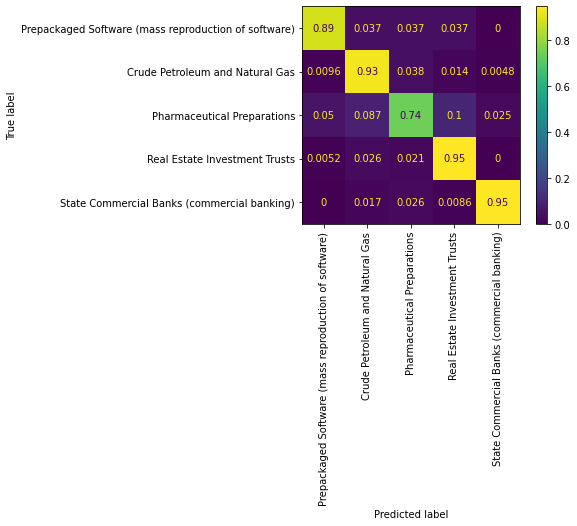

In [3]:
tf_dp = std_func.conf_mat(tfidf, data)

##### Word2Vec
Word2Vec is a shallow neural network that learns word vectors that represent how related each word is to every other word in the corpus. It can be implemented in two different ways; continuous bag of words (CBOW) or skip-gram negative sampling (SGNS). CBOW works by taking the surrounding words of a context word as input, along with sampled words further from the context word to learn word vectors in order to output a prediction score for the context word. SGNS works by taking a context word as an input and learning word vectors of its surrounding words and outputting probabilities of which words are most likely to be surrounding it. After training on a corpus of text, we take the trained word vectors and map them to documents, creating a word embedding for each document based on the average of all the word vectors of words in that document. 













In [4]:
from gensim.models.word2vec import Word2Vec
from gensim import utils

revs_processed = data["coDescription_stopwords"].apply(lambda x: utils.simple_preprocess(x))

model_w = Word2Vec(revs_processed, vector_size=200)

def doc_to_vec(text):
    word_vecs = [model_w.wv[w] for w in text if w in model_w.wv]
    
    if len(word_vecs) == 0:
        return np.zeros(model_w.vector_size)
    
    return np.mean(word_vecs, axis = 0)

doc_vec = pd.DataFrame(revs_processed.apply(doc_to_vec).tolist())

plot_w2v = std_func.pca_visualize_2d(doc_vec, data.loc[:,["name","SIC_desc"]])
std_func.pca_visualize_3d(plot_w2v)

C:\Users\maryx\Desktop\School\Year 4\STAD95\report\ubineer_nlp_research\content\std_func.py:138: FutureWarning:

Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.



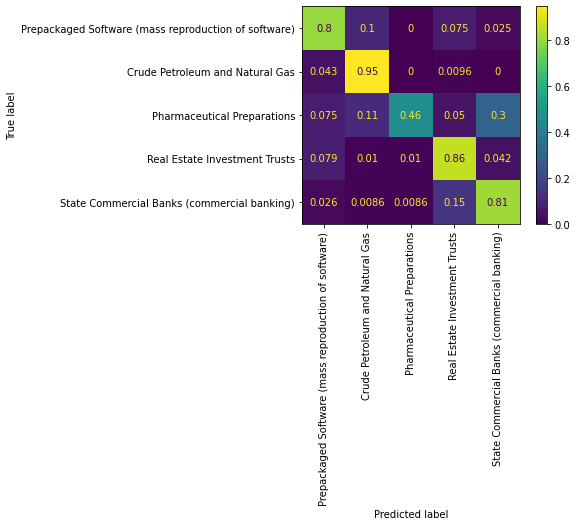

In [5]:
word_dp = std_func.conf_mat(doc_vec, data)

##### Doc2Vec
Doc2Vec is a modification to the word2vec neural network. It adds one additional input to the neural network in the form of a paragraph id (document id in our case) which identifies which document the current words are from. This results in a model of document vectors which we can use directly to create word embeddings and evaluate it’s performance.

In [6]:
from gensim.models import doc2vec
from collections import namedtuple

docs = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(data["coDescription_stopwords"]):
    words = text.lower().split()
    tags = [i]
    docs.append(analyzedDocument(words, tags))

model = doc2vec.Doc2Vec(docs, vector_size = 100, window = 10, min_count = 1, workers = 4)

doc_vec_2 = pd.DataFrame([model.dv[doc] for doc in np.arange(0,len(docs))])

del model

plot_d2v = std_func.pca_visualize_2d(doc_vec_2, data.loc[:,["name","SIC_desc"]])
std_func.pca_visualize_3d(plot_d2v)

C:\Users\maryx\Desktop\School\Year 4\STAD95\report\ubineer_nlp_research\content\std_func.py:138: FutureWarning:

Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.



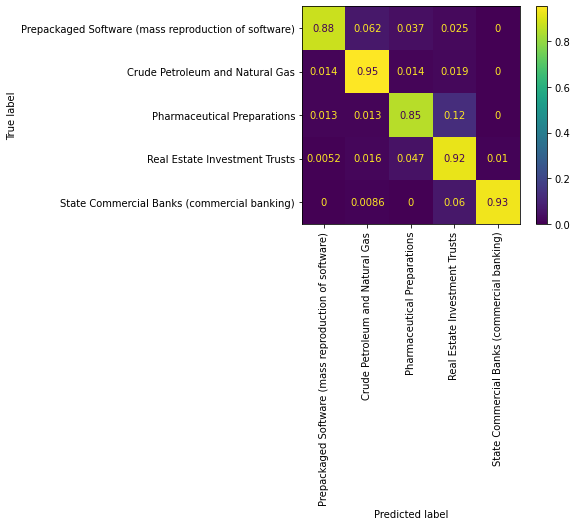

In [7]:
doc_dp = std_func.conf_mat(doc_vec_2, data)

##### Universal Sentence Encoder 
The Universal Sentence Encoder encodes text into high-dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks. It is a pre-trained model created by Google that uses sources like Wikipedia, web news, web question-answer pages, and discussion forums. There are two variations of the model, one trained with Transformer encoder and the other with Deep Averaging Network (DAN). The one with Transformer encoder is computationally more intensive but provides better results, while DAN trades accuracy for lower computational requirements. In our works, the model with DAN has provided results with high accuracy so we do not require the Transformer encoder alternative. The input is a variable-length English text and the output is a normalised 512-dimensional vector. 

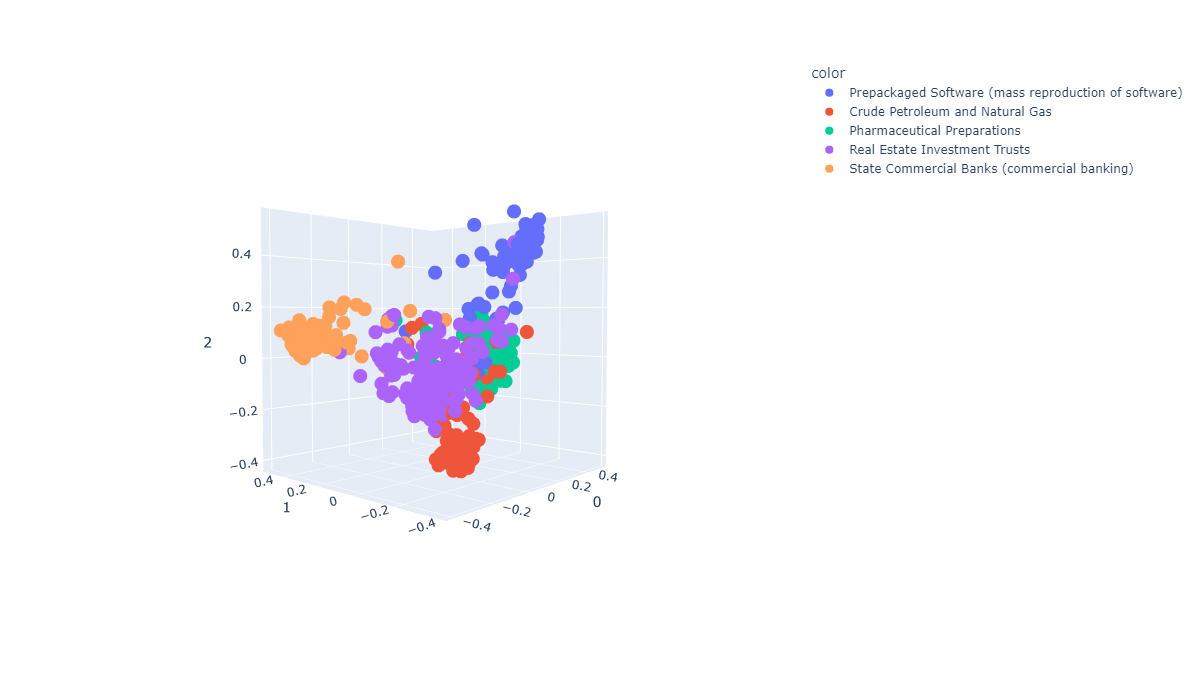

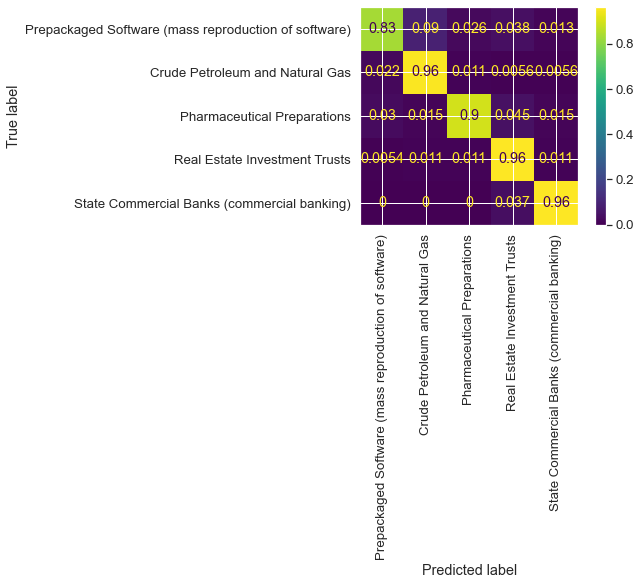

##### Two Towers
The two-tower model learns to represent two items of various types (such as user profiles, search queries, web documents, answer passages, or images) in the same vector space, so that similar or related items are close to each other. These two items are referred to as the query and candidate object, since when paired with a nearest neighbour search service such as Vertex Matching Engine, the two-tower model can retrieve candidate objects related to an input query object. These objects are encoded by a query and candidate encoder (the two "towers") respectively, which are trained on pairs of relevant items.

Since we wish to retrieve financial entities related to each other, we have the query item as the business description in plain text and the candidate item as the CIK ticker and its SIC category description of the financial entity. 

Training Data
We used the 2018 filings of companies descriptions from the top 5 categories (Prepackaged Software, Pharmaceutical Preparations, Crude Petroleum and Natural Gas, Real Estate Investment Trusts, State Commercial Banks) to train our model. Filings from multiple years for each company is used so that the model has a better understanding of each company and its relevant descriptions. 

Structure of a single record in the training data: 
```
{
        "query":
        {
            "description": x["coDescription"]
        },
        "candidate":
        {
            "financial_entity": x["CIK"],
            "category" : x["SIC_desc"]
        }
}
```

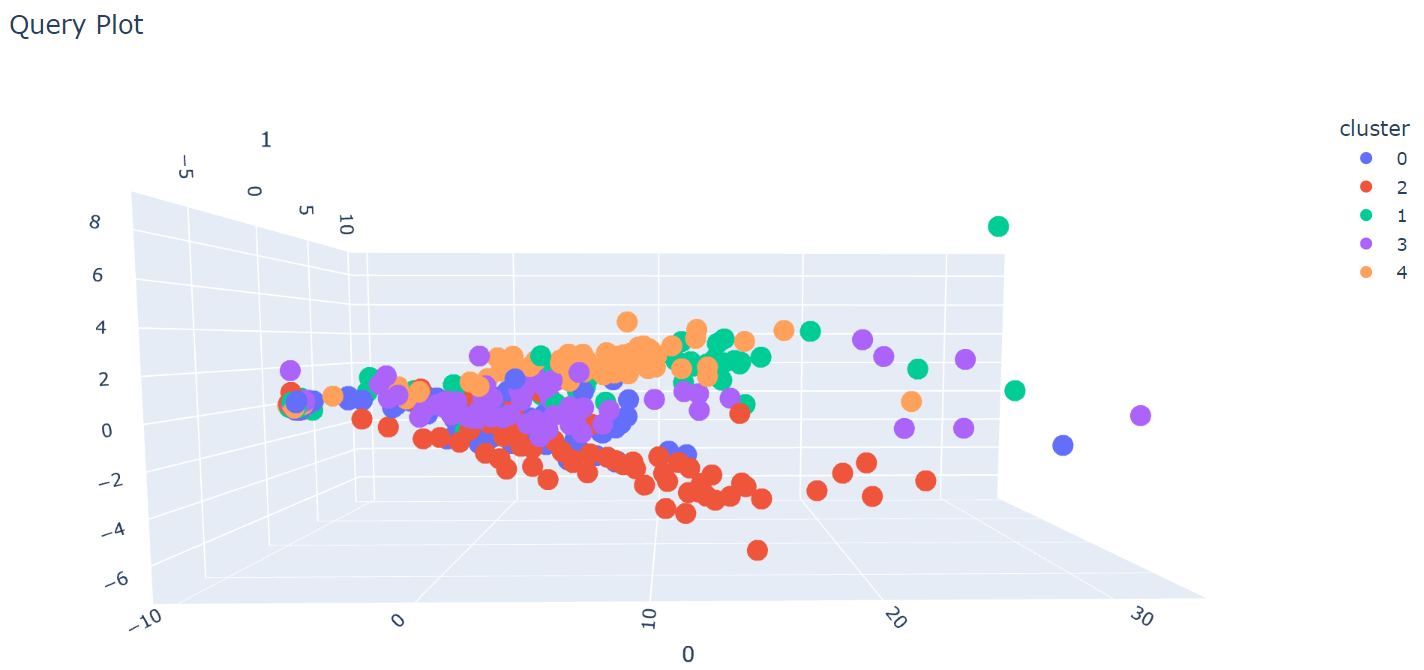

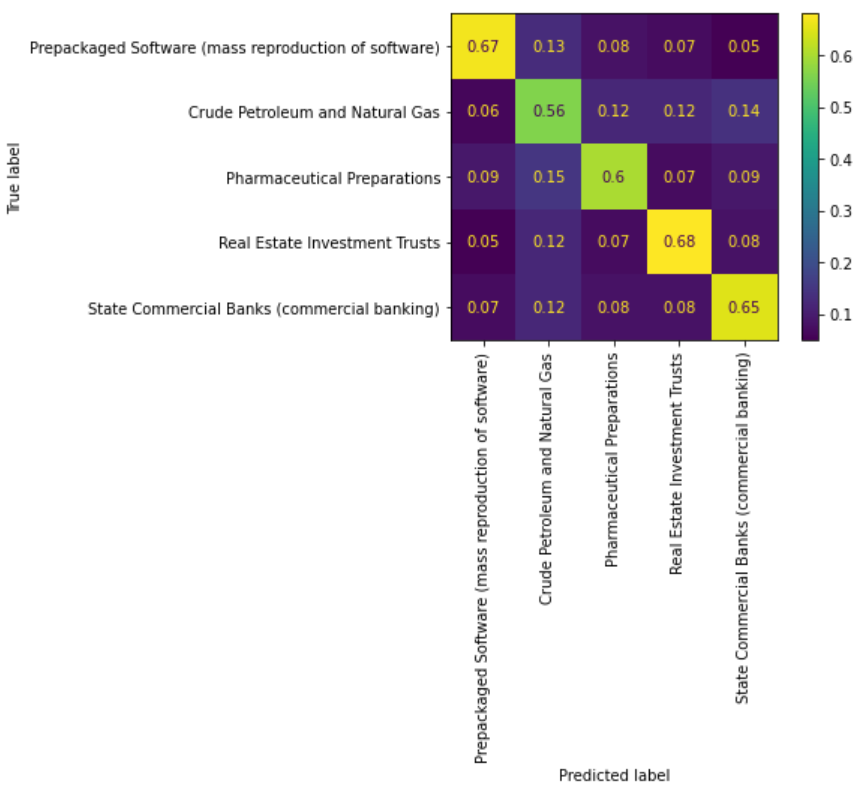

##### Cosine Similarity Distance on word counts
Cosine similarity measures the similarity between two vectors of an inner product space. In text analysis, a document can be represented by its elements (words) and the frequency of each element. Comparing the frequency of words in different documents, which is the company description for companies in our case, would generate cosine similarity distance between documents. Each description generates a vector containing the frequency of each word. It measures the similarity between these companies in terms of their business description.

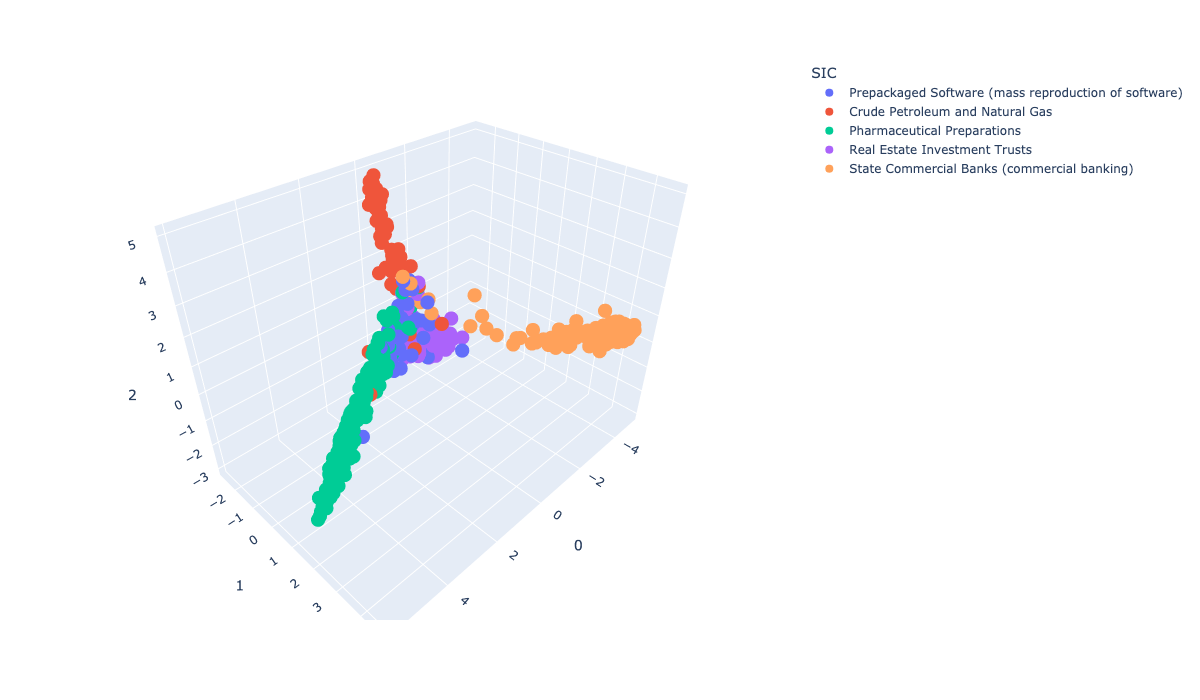

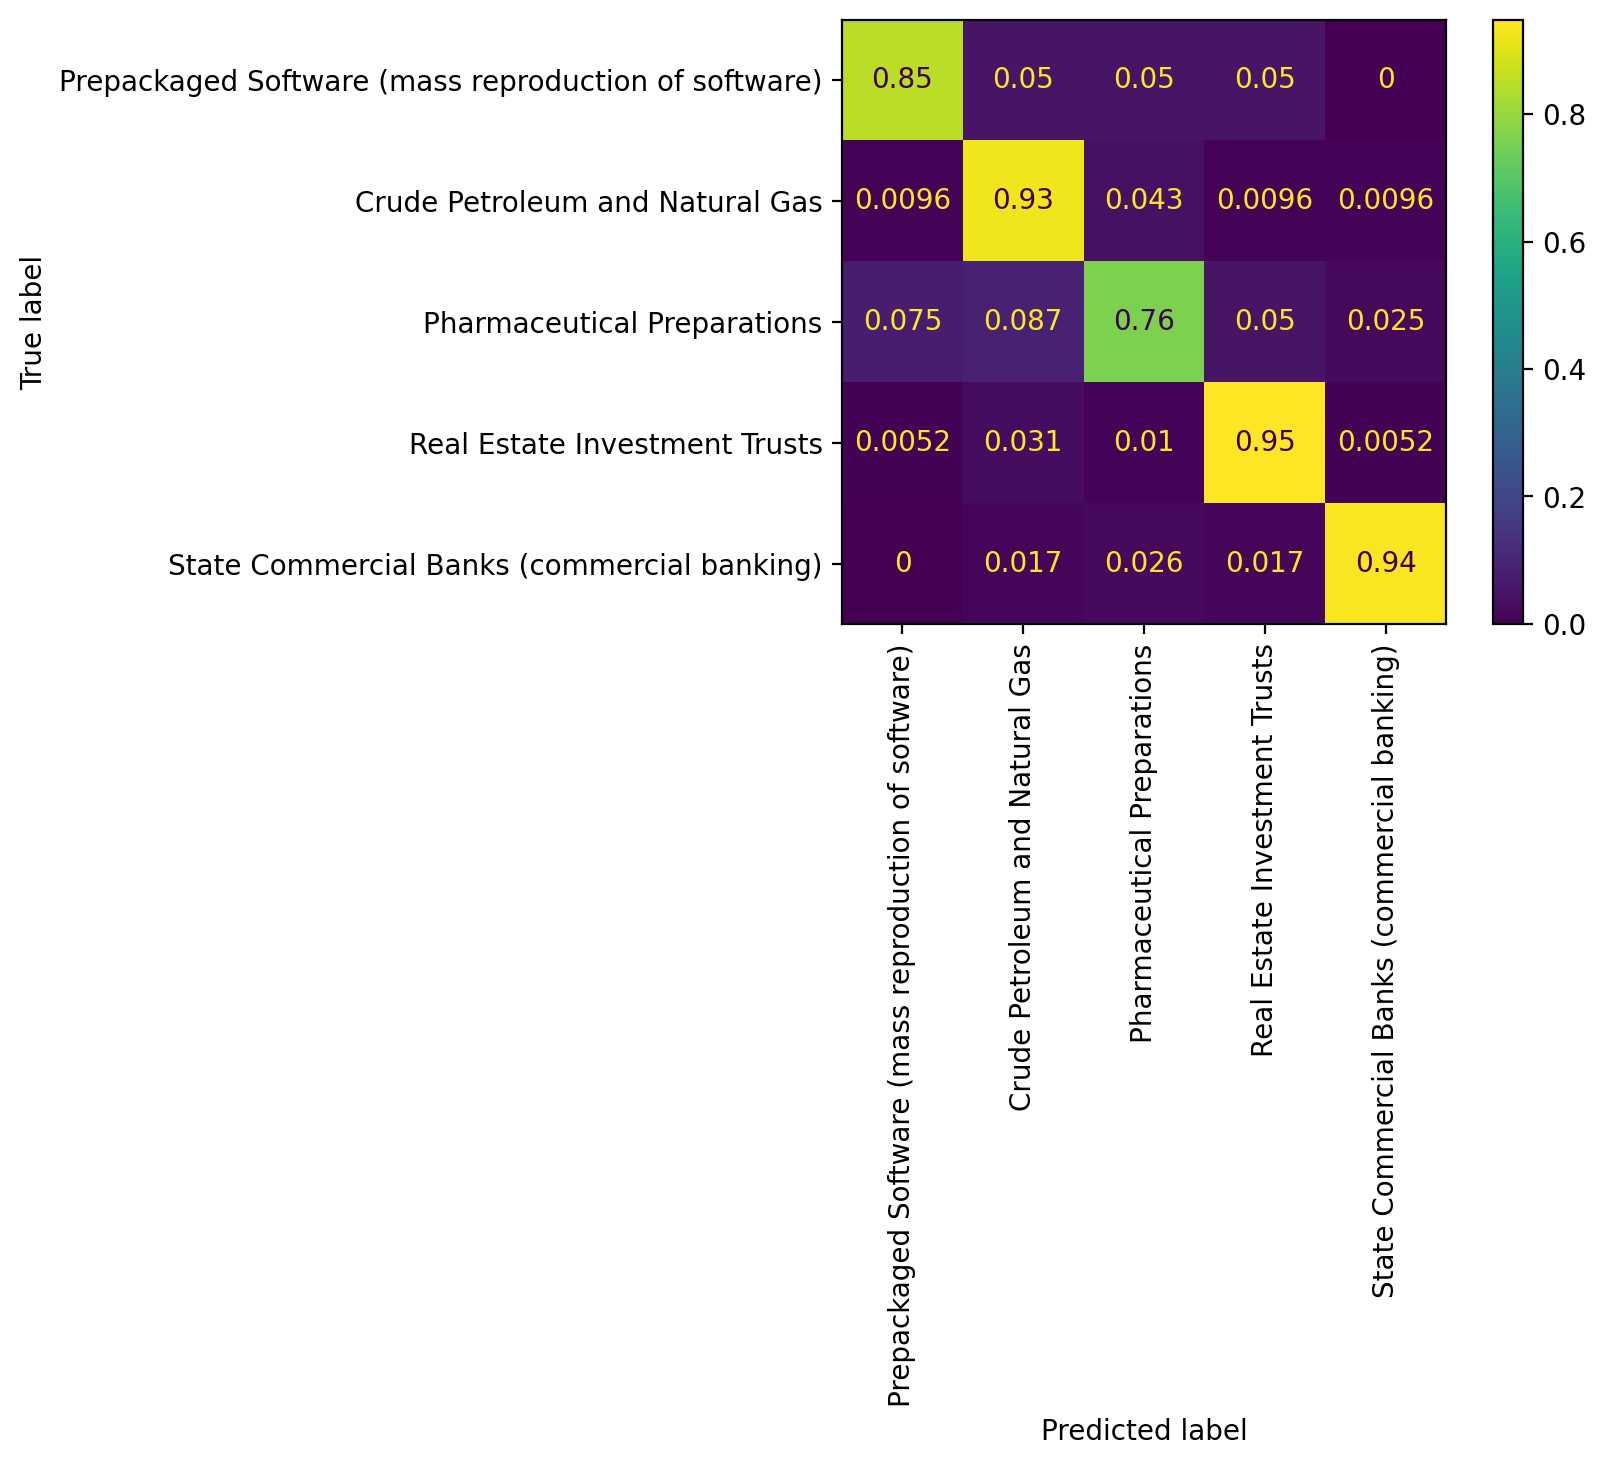

##### Part-of-Speech Tagging
Part-of-speech (POS) tagging is a process to classify texts into list of tuples where each word in the sentence gets a tag (label) that tells its part of speech (e.g. noun, pronoun, verb, adjective, adverb). Here we only consider 1-gram nouns. We conduct the consine similarity measure on the word counts from POS tagging.

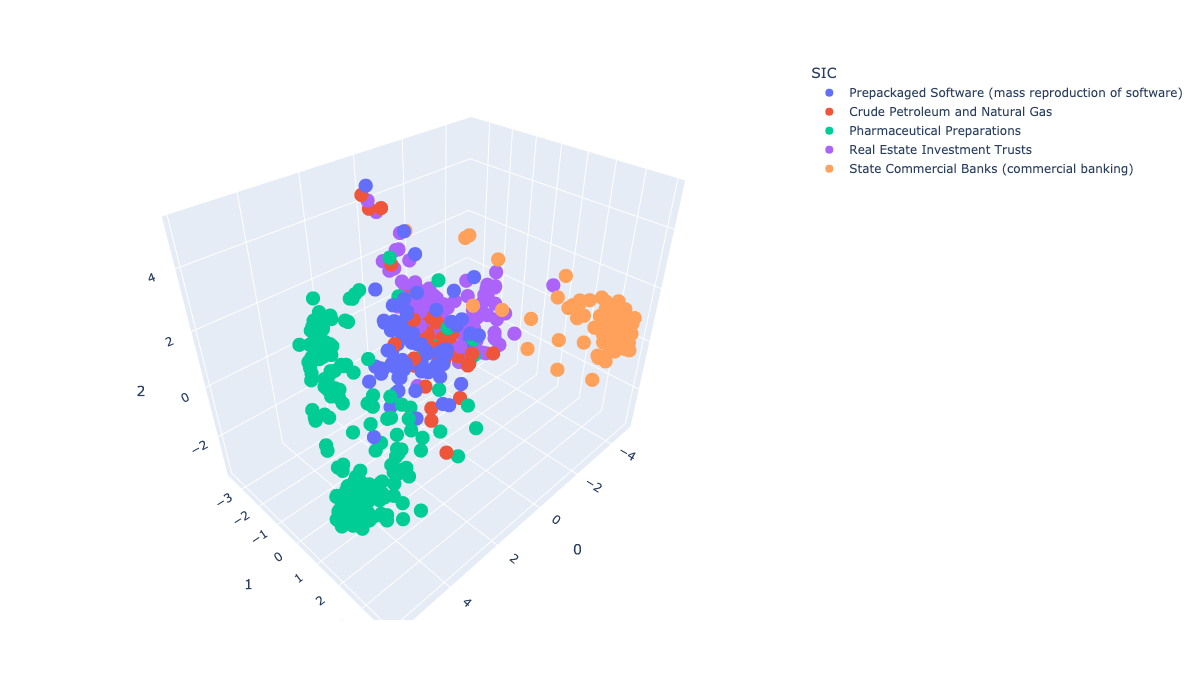

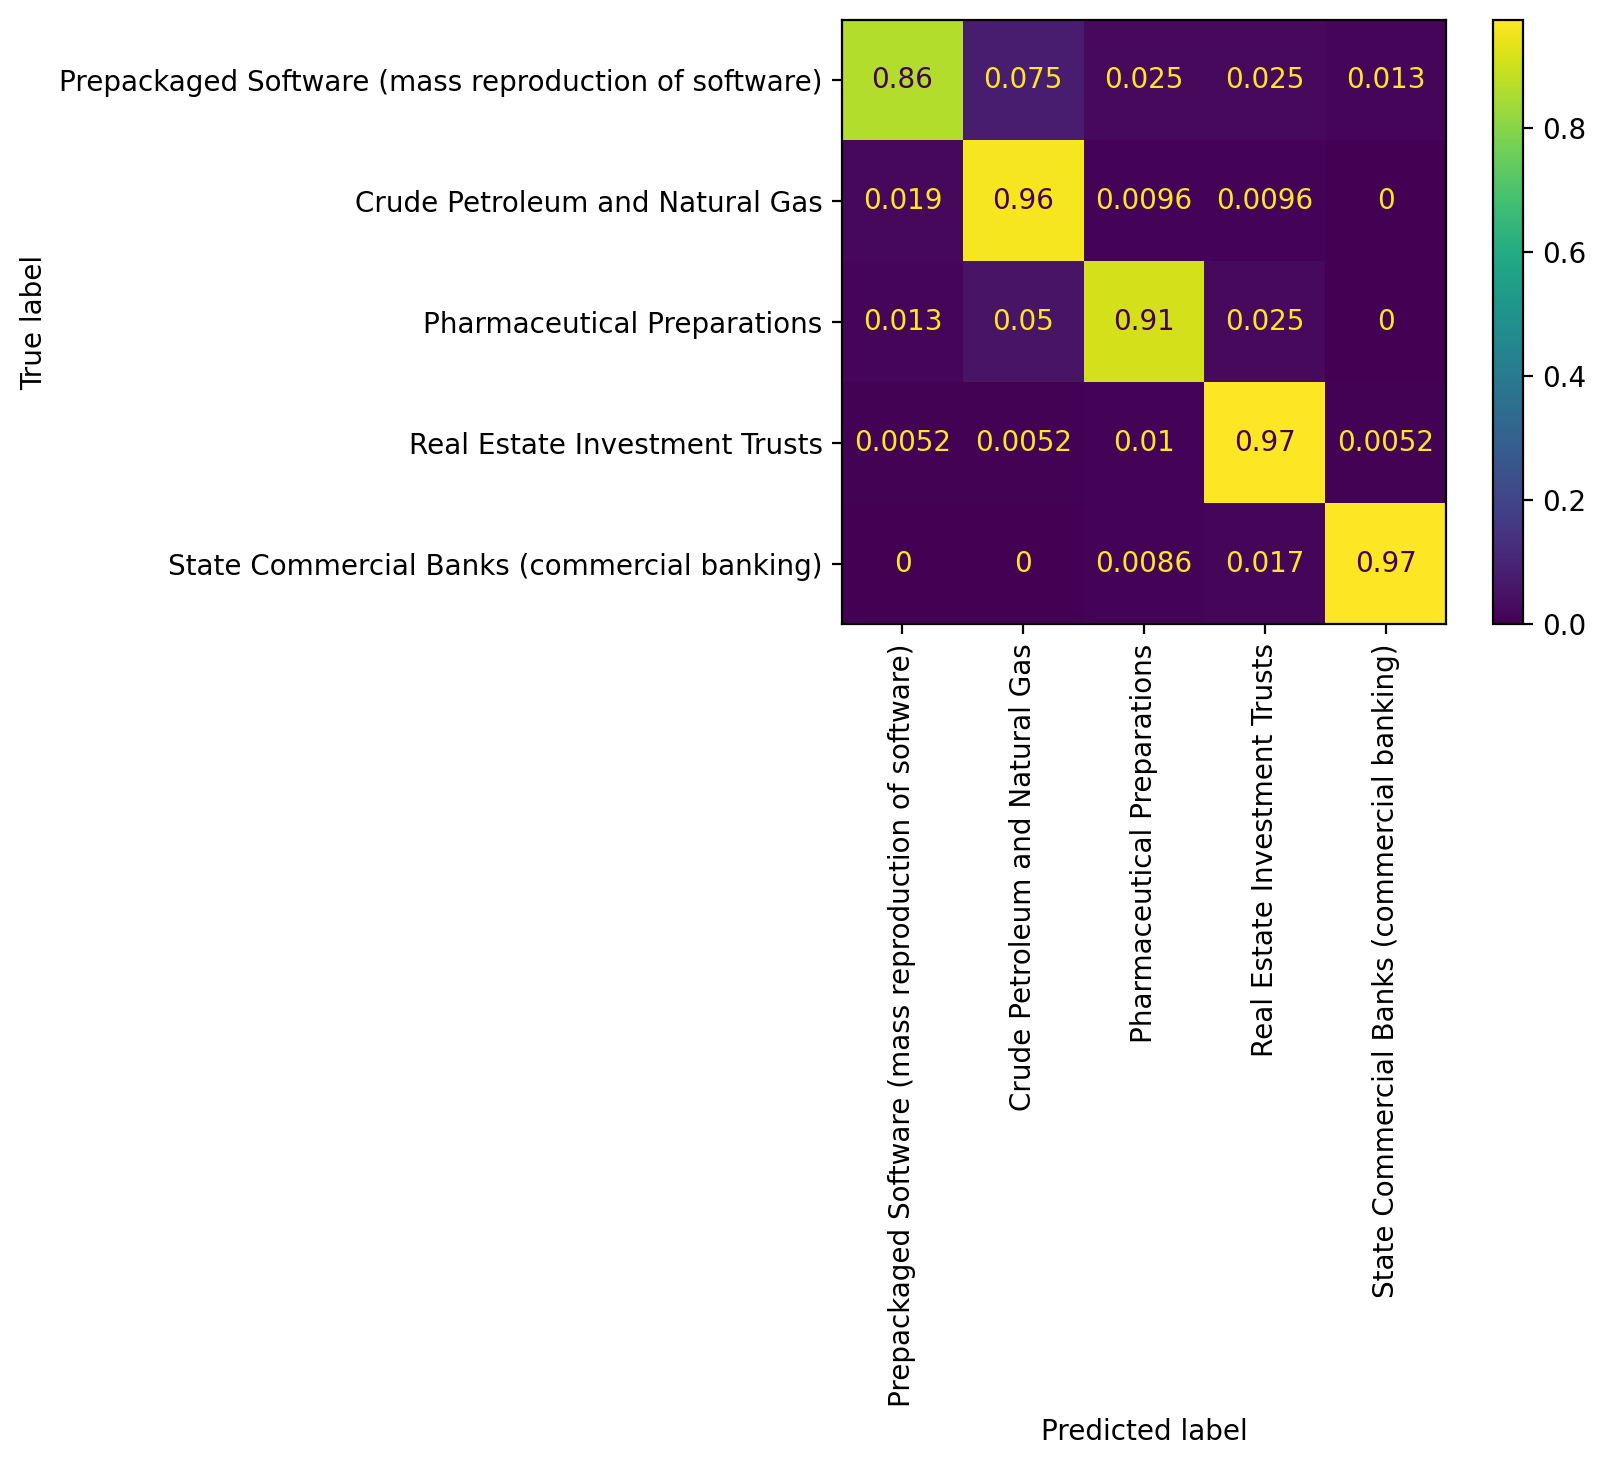

##### LDA
Description
LDA stands for Latent Dirichlet Allocation. This algorithm takes a term frequency matrix or tf-idf matrix as an input, and learns distributions of term/n-gram over n pre-determined amount of topics. Once this is completed, it again learns distributions of documents over those topics, and outputs a vector of length n of probabilities of membership in each topic for each document. For example, if we want to learn two topics and we have a document with the sentence “I enjoy watching racing sports such as F1, MotoGP, and Nascar however I stay active by playing hockey.”. Assume LDA will reasonably estimate two topics, one of which will have a high term frequency of “F1, Nascar, racing” and the other “hockey”. Given these topics, LDA will give our document a vector of [0.80, 0.20] as it contains mainly racing related terms, and only a small amount of hockey related terms.

In [77]:
from sklearn.decomposition import LatentDirichletAllocation

#set the number of topics
n_components = 5

pipe_lda = Pipeline([('count', CountVectorizer(ngram_range = (2,5), max_features = 600)),
                 ('tfidf', TfidfTransformer()),
                 ('lda', LatentDirichletAllocation(n_components = n_components))]).fit(data["coDescription_stopwords"])

lda_df = pd.DataFrame(pipe_lda.transform(data["coDescription_stopwords"]))

plot_lda = std_func.pca_visualize_2d(lda_df, data.loc[:,["name","SIC_desc"]])
std_func.pca_visualize_3d(plot_lda)

In [78]:
# we can also look at the top 5 words per topic

lda_weights = pd.DataFrame(pipe_lda["lda"].components_, columns = pipe_lda["count"].get_feature_names_out())

lda_weights = lda_weights.melt(ignore_index = False).reset_index()

lda_weights.groupby('index').apply(lambda x:x.sort_values('value', ascending=False).iloc[0:5])

index               variable      value
index                                              
0     1425      0        holding company  41.106648
      1910      0            natural gas  32.651505
      245       0           bank holding  31.050135
      250       0   bank holding company  30.151869
      1150      0        federal reserve  24.241324
1     506       1         clinical trial  65.327399
      2246      1      product candidate  40.249471
      2176      1         phase clinical  24.907510
      2911      1           united state  22.097556
      2181      1   phase clinical trial  19.441136
2     1527      2  intellectual property  14.420008
      817       2            data center  12.482278
      2452      2            report form  10.398429
      2272      2   professional service   9.722201
      2507      2   research development   9.162711
3     703       3       convertible note   2.342762
      428       3   cash cash equivalent   1.571131
      433       3        cash equivalent   1.518064
      423       3              cash cash   1.498497
      608       3             company ha   0.947248
4     2374      4            real estate  52.526608
      579       4           common stock  24.424900
      2059      4  operating partnership  20.096240
      2719      4            square foot  18.145782
      1594      4          joint venture  17.965440

C:\Users\maryx\Desktop\School\Year 4\STAD95\report\ubineer_nlp_research\content\std_func.py:138: FutureWarning:

Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.



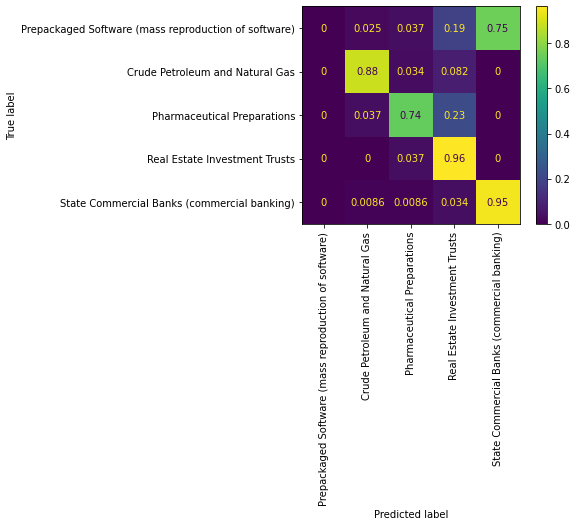

In [79]:
lda_dp = std_func.conf_mat(lda_df, data)

##### LSA
Description
LSA stands for Latent Semantic Analysis. This algorithm uses Singular Value Decomposition (SVD) to reduce a term-frequency/tf-idf matrix down from a high dimensional space into a lower dimensional space. In scikit-learn it is known as TruncatedSVD. LSA is similar to PCA in how it works, except it does not center the data beforehand which works better for sparse matrices (exactly what a term-frequency/tf-idf matrix is). It is mainly used to identify and reduce the document term matrix down to the most important terms/n-grams and therefore should provide the semantic information about which words are most important for our documents, and how closely they are to eachother within our lower dimensional space.


In [80]:
# plot_svd = std_func.visualize_svd(tfidf, data.loc[:,["name","SIC_desc"]])

fig = px.scatter_3d(plot_svd[1], x =0 , y = 1, z = 2, hover_data={"name": plot_svd[1].index.get_level_values(0),
                                                              "industry": plot_svd[1].index.get_level_values(1)},
                    color = plot_svd[1].index.get_level_values(1), width=1200, height=700)
fig.show()

#### Topic Modelling

In this section, we apply several topic modelling techniques to the documents between the years of 2016 and 2018 to detect differences and emerging themes within a company. By finding these differences, we can see how the company has evolved over the years and understand shifts in operation of the company. More specifically, we explored Non-negative matrix factorization (NMF), latent dirichilet allocation (LDA), and Latent semantic analysis (LSA)

###### Exploring Known Companies With Transitional Phase
Netflix (NTFL) and General Electric (GE) are companies that have evolved drastically over the past 15 years. We applied topic modelling to these two companies over several years of data to identify their emerging trends.

In [3]:
## Dynamic Topic Modelling with Netflix, GE
targetComp = pd.read_csv("data/dynamic_companies.csv")
netflix = targetComp[targetComp["financialEntity"] == "financialEntities/params;cik=1065280"].sort_values(["filingDate"])
ge = targetComp[targetComp["financialEntity"] == "financialEntities/params;cik=40545"].sort_values(["filingDate"])

##### Non-Negative Matrix Factorization
Non-negative matrix factorization uses linear algebra to discover underlying relationships between texts. It factorizes/decomposes high-dimensionality vectors(tf-idf or word embeddings) into a lower dimensional representation.

Given an original matrix obtained using TF-IDF or any word embedding algorithm of size MxN where M is the number of documents and N is the number of ngrams, NMF generates the **Feature** matrix and **Components** matrix. The Features matrix represents weights of topics for each doument and Component matrix represent the topics it found. NMF modifies the values of the initial Feature matrix and Components matrix so that the product approaches the original matrix until approximation error converges or max iterations are reached.

$Original Matrix \approx$ $Features \times Components$ 


NMF is very sensitive to the hyperparameters such as the number of topics, so we need to use coherence scores to evaluate the most optimal number of topics. Coherence score measures the relative distance between words within a topic.  
- CV coherence score creates content vectors of words using their co-occurrences (ie. co-occurence of "Las" and "Vegas" would be very high) and, after that, calculates the score using normalized pointwise mutual information (NPMI). NPMI is the likelihood of the co-occurrence of two words, taking into account the fact that it might be caused by the frequency of the single words. 

$NPMI(a,b) = \frac{log\frac{P(a,b)+\epsilon}{P(a)P(b)}}{-log(P(a,b)+\epsilon)}$

Probabilities of single words p(a) or the joint probability of two words p(a,b) can be estimated by Boolean document calculation, that is, the number of documents in which (a) or (a,b) occurs, divided by the total number of documents.

We calculate the global coherence of the topic as the average pairwise coherence scores on the top N words which describe the topic.

We ran the metric over a range of 3 to 40 topics, incrementing by 1 and achieved the result below. Although coherence is highest for 6 topics, we know that there are close to 50 different categories of companies in the dataset and thus 6 topics will not give well separated results. Therefore, we chose the give our model 18 topics, which has the next highest coherence score and will not give topics that are too specific to this set of data. If you're interested in the code, see this  [file](https://richardye101.github.io/ubineer_nlp_research/lab?path=mary%2FWeek+10+-+NMF+vs+LDA+vs+LSA.ipynb)
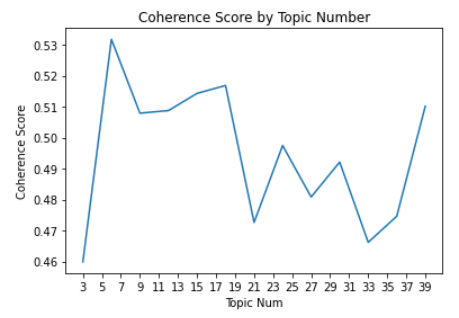

The table below illustrates the results produced by the NMF model tuned to generate 18 topics. Each column is a topic identified by the column index and is represented by the top 10 words in the topic by weight. 

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
filtered = pd.read_csv("mary/filtered_timeseries_data.csv")
filtered_data = filtered.loc[:,"coDescription_stopwords"].to_list()
filtered_dates = filtered["filingDate"].to_list()

tf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=2000) 
filtered_all_X = tf_vectorizer.fit_transform(filtered_data)

nmf_model = NMF(n_components=18, init='nndsvd', random_state=0)
nmf_feature = nmf_model.fit_transform(filtered_all_X)
nmf_component =nmf_model.components_

std_func.get_topics(nmf_model,tf_vectorizer, 18)

C:\Users\maryx\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic # 01   Topic # 02   Topic # 03 Topic # 04   Topic # 05  \
0       customer        store        share    patient         loan   
1  manufacturing  merchandise        stock   clinical         bank   
2       material     customer       common        fda       credit   
3  semiconductor        brand    agreement      trial  institution   
4     technology      apparel       merger       drug     borrower   
5      equipment       retail  shareholder     cancer     mortgage   
6     industrial       fiscal     director     device      deposit   
7        segment   assortment       issued  treatment      lending   
8         system     retailer  outstanding      study      federal   
9       solution     footwear     exchange    therapy       estate   

   Topic # 06 Topic # 07   Topic # 08 Topic # 09 Topic # 10    Topic # 11  \
0         gas    ethanol     software  president        tax         brand   
1         oil       corn     customer       vice     income          food   
2     natural      grain  application    officer       cash      consumer   
3    drilling  distiller     solution      chief      asset       segment   
4        well       fuel         data     served       note        retail   
5    pipeline     gallon     platform  executive        net      beverage   
6  production      plant         user     senior       loss    restaurant   
7     reserve   gasoline        cloud      since  liability     agreement   
8       crude  renewable      network   director  statement    ingredient   
9       water     energy       mobile    joining      ended  distribution   

      Topic # 12  Topic # 13      Topic # 14    Topic # 15     Topic # 16  \
0        mineral  investment        cannabis          home           item   
1    exploration        fund         medical          land      statement   
2         mining     adviser           lease      property     registrant   
3          claim   portfolio        property  construction           part   
4           gold      income        colorado     community    stockholder   
5       property     capital  pharmaceutical      mortgage         equity   
6        project     advisor        facility        estate  supplementary   
7           mine    security         growing          real     discussion   
8         permit         fee           plant      building     disclosure   
9  environmental      equity         warrant   residential             ii   

   Topic # 17 Topic # 18  
0      client   aircraft  
1    solution     system  
2        care   aviation  
3  healthcare     flight  
4      health      power  
5    provider   military  
6     provide     energy  
7     segment     engine  
8     revenue    defense  
9    security   contract

###### Netflix Analysis

In [25]:
netflix_X = tf_vectorizer.transform(netflix["coDescription"].tolist())
netflix_top = nmf_model.transform(netflix_X)
netflix_top_df = pd.DataFrame(netflix_top).set_index(netflix["filingDate"])
netflix_top_df.columns = ["Topic #" + str(i) for i in range(1,18+1)]
netflix_top_df

Topic #1  Topic #2  Topic #3  Topic #4  Topic #5  \
filingDate                                                               
2008-02-28T00:42:30Z       0.0  0.033749  0.009773  0.003087       0.0   
2009-02-25T21:22:45Z       0.0  0.021678  0.012500  0.002736       0.0   
2010-02-22T19:09:32Z       0.0  0.021152  0.006317  0.002052       0.0   
2011-02-18T19:42:40Z       0.0  0.000000  0.009759  0.002991       0.0   
2012-02-10T22:29:24Z       0.0  0.000197  0.005253  0.000000       0.0   

                      Topic #6  Topic #7  Topic #8  Topic #9  Topic #10  \
filingDate                                                                
2008-02-28T00:42:30Z  0.000000  0.001203  0.105387  0.000000   0.000604   
2009-02-25T21:22:45Z  0.000000  0.001089  0.098694  0.000000   0.000942   
2010-02-22T19:09:32Z  0.000116  0.001395  0.106117  0.000000   0.003437   
2011-02-18T19:42:40Z  0.000852  0.000510  0.078863  0.004264   0.000000   
2012-02-10T22:29:24Z  0.002877  0.001916  0.091677  0.005721   0.018389   

                      Topic #11  Topic #12  Topic #13  Topic #14  Topic #15  \
filingDate                                                                    
2008-02-28T00:42:30Z   0.015683   0.000000   0.001619   0.003541   0.092819   
2009-02-25T21:22:45Z   0.024915   0.000000   0.000000   0.005398   0.078665   
2010-02-22T19:09:32Z   0.038294   0.000000   0.002327   0.007574   0.060922   
2011-02-18T19:42:40Z   0.035831   0.009111   0.007256   0.001856   0.037497   
2012-02-10T22:29:24Z   0.047559   0.009022   0.001576   0.002737   0.044696   

                      Topic #16  Topic #17  Topic #18  
filingDate                                             
2008-02-28T00:42:30Z   0.001405        0.0        0.0  
2009-02-25T21:22:45Z   0.007068        0.0        0.0  
2010-02-22T19:09:32Z   0.004910        0.0        0.0  
2011-02-18T19:42:40Z   0.012142        0.0        0.0  
2012-02-10T22:29:24Z   0.030437        0.0        0.0

In [26]:
#compare 2012 with 2008 
netflix_top_df.iloc[-1] - netflix_top_df.iloc[0]

Topic #1     0.000000
Topic #2    -0.033552
Topic #3    -0.004520
Topic #4    -0.003087
Topic #5     0.000000
Topic #6     0.002877
Topic #7     0.000713
Topic #8    -0.013710
Topic #9     0.005721
Topic #10    0.017785
Topic #11    0.031877
Topic #12    0.009022
Topic #13   -0.000044
Topic #14   -0.000804
Topic #15   -0.048122
Topic #16    0.029032
Topic #17    0.000000
Topic #18    0.000000
dtype: float64

- decrease in topic 2(retail/store), 15(real estate/land)
- increase in topic 10 (finances), 11 (branding?)
- interesting decrease in topic 8(software)

###### General Electric Analysis

In [27]:
ge_X = tf_vectorizer.transform(ge["coDescription"].tolist())
ge_top = nmf_model.transform(ge_X)
ge_top_df = pd.DataFrame(ge_top).set_index(ge["filingDate"])
ge_top_df.columns = ["Topic #" + str(i) for i in range(1,18+1)]
ge_top_df

Topic #1  Topic #2  Topic #3  Topic #4  Topic #5  \
filingDate                                                               
2011-02-25T21:33:50Z  0.005783       0.0  0.000000  0.018758  0.033466   
2012-02-24T21:29:18Z  0.008547       0.0  0.000000  0.017347  0.038136   
2013-02-26T22:17:59Z  0.008145       0.0  0.004124  0.011744  0.036340   
2014-02-27T21:55:58Z  0.014820       0.0  0.000000  0.011797  0.053665   

                      Topic #6  Topic #7  Topic #8  Topic #9  Topic #10  \
filingDate                                                                
2011-02-25T21:33:50Z  0.066518  0.003005  0.010779  0.004617        0.0   
2012-02-24T21:29:18Z  0.090291  0.000000  0.000000  0.003611        0.0   
2013-02-26T22:17:59Z  0.093799  0.000000  0.000000  0.000945        0.0   
2014-02-27T21:55:58Z  0.085865  0.000000  0.000000  0.003106        0.0   

                      Topic #11  Topic #12  Topic #13  Topic #14  Topic #15  \
filingDate                                                                    
2011-02-25T21:33:50Z   0.031463        0.0   0.044483   0.007450   0.067200   
2012-02-24T21:29:18Z   0.025189        0.0   0.043732   0.004452   0.053964   
2013-02-26T22:17:59Z   0.026736        0.0   0.036184   0.005289   0.049009   
2014-02-27T21:55:58Z   0.033487        0.0   0.042349   0.011512   0.042447   

                      Topic #16  Topic #17  Topic #18  
filingDate                                             
2011-02-25T21:33:50Z   0.043281   0.009883   0.196756  
2012-02-24T21:29:18Z   0.051812   0.015523   0.199916  
2013-02-26T22:17:59Z   0.067062   0.012661   0.199021  
2014-02-27T21:55:58Z   0.072443   0.016210   0.162564

In [93]:
# #compare 2014 to 2011 
ge_top_df.iloc[-1] - ge_top_df.iloc[0]

0     0.009036
1     0.000000
2     0.000000
3    -0.006961
4     0.020200
5     0.019347
6    -0.003005
7    -0.010779
8    -0.001511
9     0.000000
10    0.002024
11    0.000000
12   -0.002135
13    0.004062
14   -0.024753
15    0.029161
16    0.006327
17   -0.034192
dtype: float64

- decrease in topic 15(real estate/land), 18(aerospace, vehicles)
- increase in topic 5(loan/bank), 6(energy/gas), 16 (financial/analysis)

##### LSA

In [95]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=20)
svd_model = pd.DataFrame(svd.fit_transform(filtered_all_X))
std_func.get_topics(svd,tf_vectorizer, 20)

C:\Users\maryx\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Topic # 01     Topic # 02   Topic # 03      Topic # 04   Topic # 05  \
0        customer          store        store         patient         loan   
1           store       customer  merchandise        clinical         bank   
2          system    merchandise         loan             fda      patient   
3          fiscal          brand        share            drug          fda   
4           share        apparel        stock           trial     clinical   
5           brand         retail        brand          cancer     mortgage   
6      technology       retailer       common           store       credit   
7       agreement         fiscal   investment           study        trial   
8           stock       footwear      apparel       treatment         drug   
9         segment     assortment       retail         medical       estate   
10       solution      accessory         bank  pharmaceutical      federal   
11       material         center       income          device   investment   
12           cost        segment          tax         therapy         rate   
13    application        fashion       estate         disease  institution   
14  approximately  merchandising     interest        approval         real   
15        believe        believe        asset            care       cancer   
16     regulation           vice         real           share     borrower   
17       industry      wholesale         fund           blood         home   
18         common         online  shareholder          health    treatment   
19  manufacturing   distribution       credit       candidate      deposit   

       Topic # 06  Topic # 07   Topic # 08 Topic # 09    Topic # 10  \
0             oil     ethanol          gas  president          loan   
1             gas        corn          oil       vice         share   
2         ethanol       grain     software    officer       mineral   
3         natural   distiller  exploration      chief      cannabis   
4      production    software       client     served          bank   
5     exploration      client     property  executive     agreement   
6           water      gallon      natural     client   exploration   
7        drilling        data      mineral       care        mining   
8           grain    solution         data     senior         stock   
9         mineral        fuel     drilling       food          home   
10           corn    platform     platform        oil      property   
11           fuel    gasoline     solution       loan        nevada   
12         energy   renewable      project        gas       project   
13           food        user         user      since  construction   
14      distiller       plant       mining   director          land   
15          plant      mobile       online       bank          gold   
16       property       cloud        store    joining        common   
17       pipeline      online       mobile      brand        estate   
18  environmental  lincolnway        cloud    natural          real   
19          price          rf        claim     health         brand   

      Topic # 11   Topic # 12     Topic # 13   Topic # 14    Topic # 15  \
0           food      mineral     investment     customer          home   
1          brand       mining           fund       merger      cannabis   
2         client  exploration        adviser       client        client   
3     investment      project         client       target      aircraft   
4     restaurant        claim      portfolio      vehicle  construction   
5       consumer     property        advisor  transaction          land   
6       beverage         mine       cannabis  opportunity       segment   
7           fund         gold          store     security          item   
8     ingredient      ethanol        capital         loan      contract   
9        segment    statement          power  acquisition      building   
10  distribution         item  semiconductor       

###### Netflix Analysis

In [103]:
netflix_top = svd.transform(netflix_X)
netflix_top_df = pd.DataFrame(netflix_top).set_index(netflix["filingDate"])
netflix_top_df

0         1         2         3         4   \
filingDate                                                               
2008-02-28T00:42:30Z  0.320044  0.086204 -0.012437 -0.003215 -0.026708   
2009-02-25T21:22:45Z  0.298948  0.057729 -0.011819  0.004651 -0.036616   
2010-02-22T19:09:32Z  0.311064  0.075021 -0.032043 -0.002120 -0.028262   
2011-02-18T19:42:40Z  0.235158  0.009781 -0.028777  0.007054 -0.037519   
2012-02-10T22:29:24Z  0.298476  0.011272 -0.029647 -0.010909 -0.043794   

                            5         6         7         8         9   \
filingDate                                                               
2008-02-28T00:42:30Z -0.089364  0.096451  0.159091 -0.005008  0.071680   
2009-02-25T21:22:45Z -0.081802  0.092061  0.143524 -0.000026  0.073711   
2010-02-22T19:09:32Z -0.084294  0.092821  0.134502 -0.001647  0.066054   
2011-02-18T19:42:40Z -0.057187  0.063241  0.094349  0.028376  0.047647   
2012-02-10T22:29:24Z -0.058492  0.064437  0.094738  0.016880  0.024255   

                            10        11        12        13        14  \
filingDate                                                               
2008-02-28T00:42:30Z  0.045616 -0.012593 -0.073580 -0.114456  0.049864   
2009-02-25T21:22:45Z  0.057718 -0.020197 -0.085323 -0.121206  0.047407   
2010-02-22T19:09:32Z  0.066578 -0.032319 -0.090152 -0.119852  0.023481   
2011-02-18T19:42:40Z  0.070884 -0.004591 -0.079346 -0.093457 -0.003132   
2012-02-10T22:29:24Z  0.076851  0.002011 -0.120840 -0.123586  0.011683   

                            15        16        17        18        19  
filingDate                                                              
2008-02-28T00:42:30Z  0.108628 -0.092068  0.005341 -0.081392 -0.018952  
2009-02-25T21:22:45Z  0.124394 -0.082718  0.036347 -0.104924 -0.017973  
2010-02-22T19:09:32Z  0.105084 -0.061448  0.033429 -0.100931 -0.003715  
2011-02-18T19:42:40Z  0.122341 -0.051115  0.043746 -0.096591 -0.014162  
2012-02-10T22:29:24Z  0.130859 -0.038289  0.034017 -0.107231 -0.000904

In [104]:
#compare 2012 with 2008 
netflix_top_df.iloc[-1] - netflix_top_df.iloc[0]

0    -0.021567
1    -0.074932
2    -0.017210
3    -0.007694
4    -0.017085
5     0.030872
6    -0.032013
7    -0.064353
8     0.021888
9    -0.047425
10    0.031236
11    0.014604
12   -0.047260
13   -0.009130
14   -0.038181
15    0.022231
16    0.053779
17    0.028676
18   -0.025840
19    0.018048
dtype: float64

- decrease in topic 2(retail/distribution) ,8(software, mining), 13(investment), 10(loan, real estate, commodities)
- increase in topic 6(natural resources/exploration), 11(food, marketing), 17(?)

###### General Electric Analysis

In [98]:
ge_top = svd.transform(ge_X)
ge_top_df = pd.DataFrame(ge_top).set_index(ge["filingDate"])
ge_top_df

0         1         2         3         4   \
filingDate                                                               
2011-02-25T21:33:50Z  0.481511 -0.076470 -0.115548 -0.131420  0.092065   
2012-02-24T21:29:18Z  0.486454 -0.092142 -0.116042 -0.148237  0.097777   
2013-02-26T22:17:59Z  0.482642 -0.097721 -0.111444 -0.152742  0.077269   
2014-02-27T21:55:58Z  0.490679 -0.096180 -0.083038 -0.154776  0.116494   

                            5         6         7         8         9   \
filingDate                                                               
2011-02-25T21:33:50Z  0.121822 -0.050542  0.006106  0.017041 -0.038410   
2012-02-24T21:29:18Z  0.161424 -0.072196  0.010277  0.022094 -0.066124   
2013-02-26T22:17:59Z  0.167583 -0.082461  0.002683  0.017329 -0.070302   
2014-02-27T21:55:58Z  0.146809 -0.079125 -0.001292  0.018459 -0.069802   

                            10        11        12        13        14  \
filingDate                                                               
2011-02-25T21:33:50Z -0.029274 -0.004681  0.064107 -0.054733  0.167655   
2012-02-24T21:29:18Z -0.057213 -0.037202  0.073226 -0.007842  0.173958   
2013-02-26T22:17:59Z -0.062646 -0.045067  0.057435  0.012019  0.180289   
2014-02-27T21:55:58Z -0.042738 -0.034474  0.041577  0.015211  0.146542   

                            15        16        17        18        19  
filingDate                                                              
2011-02-25T21:33:50Z  0.112942  0.042709  0.137954 -0.118727 -0.022960  
2012-02-24T21:29:18Z  0.095060  0.086428  0.102464 -0.102383 -0.012944  
2013-02-26T22:17:59Z  0.094255  0.112890  0.082701 -0.091235 -0.009061  
2014-02-27T21:55:58Z  0.093029  0.115379  0.055961 -0.076177  0.014733

In [99]:
# compare 2014 to 2011 
ge_top_df.iloc[-1] - ge_top_df.iloc[0]

0     0.009168
1    -0.019710
2     0.032510
3    -0.023356
4     0.024429
5     0.024987
6    -0.028583
7    -0.007398
8     0.001418
9    -0.031392
10   -0.013465
11   -0.029792
12   -0.022530
13    0.069944
14   -0.021113
15   -0.019913
16    0.072670
17   -0.081993
18    0.042550
19    0.037694
dtype: float64

- decrease in topic 10(loan, real estate, commodities), 12(comodities?),18(aerospace)
- increase in topic 3(loan/banking), 14(acquisition), 17(?)

##### LDA

We ran the coherence score benchmarking over a range of 3 to 40 topics, incrementing by 1 and achieved the result below. Although coherence is highest for 6 topics, we know that there are more than 6 categories of data and thus there should be more than 6 topics. Therefore, we chose the give our model 18 topics, which has the next highest coherence score. If you're interested in the code, see this  [file](https://richardye101.github.io/ubineer_nlp_research/lab?path=mary%2FWeek+10+-+NMF+vs+LDA+vs+LSA.ipynb)

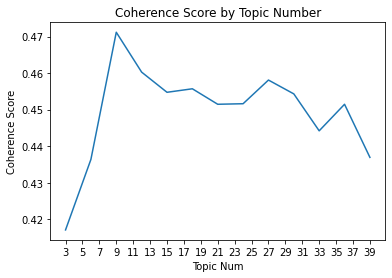

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
count_vectorizer = CountVectorizer(max_df=0.85, min_df=2, max_features=2000)
filtered_all_count_X = count_vectorizer.fit_transform(filtered_data)
count_feature_names = count_vectorizer.get_feature_names()
lda = LatentDirichletAllocation(n_components=9,random_state=0).fit(filtered_all_count_X)
std_func.get_topics(lda,count_vectorizer, 9)

Topic # 01     Topic # 02   Topic # 03      Topic # 04   Topic # 05  \
0         share       customer   investment         patient     customer   
1         stock       material     security             fda     solution   
2     agreement         system          tax        clinical       system   
3        common         energy      capital            drug   technology   
4        issued     production       income          health  application   
5          date            oil        could          patent         data   
6           per      equipment         fund         medical     software   
7         price           cost          fee          device      support   
8      director       facility      subject       treatment      provide   
9      exchange            gas          act        approval      network   
10     purchase        ethanol        asset           trial     platform   
11        right           used   regulation            care      revenue   
12     interest          power      certain          cancer     industry   
13  outstanding       industry    portfolio      technology       device   
14       merger          price     interest           study        offer   
15     security  manufacturing  requirement        research       design   
16    statement         fiscal          net      regulation      include   
17      entered          water    agreement             use     offering   
18     pursuant     technology        would  pharmaceutical         user   
19         term  approximately        share         subject      believe   

   Topic # 06     Topic # 07   Topic # 08     Topic # 09  
0       asset          store         loan       property  
1        cash       customer         bank      president  
2        note          brand      federal        program  
3         tax         retail  institution           vice  
4      fiscal         fiscal      capital        officer  
5   statement   distribution       credit           home  
6         net        believe         rate        revenue  
7   september       consumer    september  approximately  
8       value  approximately         real          chief  
9      income      marketing      million     regulation  
10    million           food       estate        project  
11       cost    merchandise        total      executive  
12      share       retailer     interest          claim  
13       loss        website        asset           land  
14      ended        segment   commercial          local  
15     amount            net     security     restaurant  
16      stock      trademark   regulation        content  
17    expense       location      deposit            law  
18  liability       purchase     mortgage           cost  
19       rate        quality       amount       contract

###### Netflix Analysis

In [105]:
netlfix_X = count_vectorizer.transform(netflix["coDescription"].tolist())
netflix_top = lda.transform(netlfix_X)
netflix_top_df = pd.DataFrame(netflix_top).set_index(netflix["filingDate"])
netflix_top_df 

0         1         2         3         4  \
filingDate                                                               
2008-02-28T00:42:30Z  0.014234  0.000079  0.000079  0.002274  0.440322   
2009-02-25T21:22:45Z  0.027362  0.000091  0.000091  0.005391  0.390749   
2010-02-22T19:09:32Z  0.000085  0.000085  0.000085  0.005399  0.448461   
2011-02-18T19:42:40Z  0.000305  0.000305  0.000305  0.007481  0.401813   
2012-02-10T22:29:24Z  0.000281  0.000281  0.000281  0.000281  0.349544   

                             5         6         7         8  
filingDate                                                    
2008-02-28T00:42:30Z  0.000079  0.234041  0.000079  0.308813  
2009-02-25T21:22:45Z  0.000091  0.270231  0.000091  0.305901  
2010-02-22T19:09:32Z  0.000085  0.294586  0.000085  0.251130  
2011-02-18T19:42:40Z  0.000305  0.209707  0.000305  0.379476  
2012-02-10T22:29:24Z  0.023560  0.266102  0.000281  0.359389

In [106]:
#compare 2012 with 2008 
netflix_top_df.iloc[-1] - netflix_top_df.iloc[0]

0   -0.013953
1    0.000202
2    0.000202
3   -0.001993
4   -0.090778
5    0.023481
6    0.032062
7    0.000202
8    0.050576
dtype: float64

- decrease in topic 1(?) ,5(software)
- increase in topic 6(finance), 7(retail), 9(legal?)

###### General Electric Analysis

In [107]:
ge_X =  count_vectorizer.transform(ge["coDescription"].tolist())
ge_top = lda.transform(ge_X )
ge_top_df = pd.DataFrame(ge_top).set_index(ge["filingDate"])
ge_top_df

0         1         2         3         4  \
filingDate                                                               
2011-02-25T21:33:50Z  0.000047  0.498023  0.036266  0.070316  0.114108   
2012-02-24T21:29:18Z  0.011215  0.533556  0.030604  0.075787  0.104087   
2013-02-26T22:17:59Z  0.034429  0.550539  0.026982  0.065935  0.115461   
2014-02-27T21:55:58Z  0.016560  0.508674  0.034713  0.068372  0.111263   

                             5         6         7         8  
filingDate                                                    
2011-02-25T21:33:50Z  0.007328  0.000047  0.112384  0.161482  
2012-02-24T21:29:18Z  0.015506  0.012698  0.135751  0.080796  
2013-02-26T22:17:59Z  0.016585  0.027572  0.141499  0.020998  
2014-02-27T21:55:58Z  0.022444  0.067732  0.169345  0.000897

In [108]:
# compare 2014 to 2011 
ge_top_df.iloc[-1] - ge_top_df.iloc[0]

0    0.016514
1    0.010651
2   -0.001553
3   -0.001944
4   -0.002845
5    0.015117
6    0.067685
7    0.056961
8   -0.160586
dtype: float64

- decrease in topic 9(legal?)
- increase in topic 7(retail), 8(finance,banking)

##### Summary of Topic Modelling
##### NMD Results

__Netflix__
- decrease in topic 2(retail/store), 15(real estate/land)
- increase in topic 10 (finances), 11 (branding?)

Note : interesting slight decrease in topic 8(software)

__GE__
- decrease in topic 15(real estate/land), 18(aerospace, vehicles)
- increase in topic 5(loan/bank), 6(energy/gas), 16 (financial/analysis)

##### LDA Results

__Netflix__
- decrease in topic 1(?) ,5(software)
- increase in topic 6(finance), 7(retail), 9(legal?)

__GE__
- decrease in topic 9(legal?)
- increase in topic 7(retail), 8(finance,banking)

##### LSA Results

__Netflix__
- decrease in topic 2(retail/distribution) ,8(software, mining), 13(investment), 10(loan, real estate, commodities)
- increase in topic 6(natural resources/exploration), 11(food, marketing), 17(?)

__GE__
- decrease in topic 10(loan, real estate, commodities), 12(comodities?),18(aerospace)
- increase in topic 3(loan/banking), 14(acquisition), 17(?)

Topics generated by the NMF model is the easiest to evaluate and is more coherent. Therefore, NMF does the best using this dataset which is expected since NMF usually has higher performance than LDA and LSA when using a small dataset.

#### Portfolio Selection
##### Mean-Variance Analysis
Mean-variance analysis is a mathematical framework that examplifies the trade-off between return and risk. It is used to create diversified portfolios based on investors’ expectation. There are three main approaches used in this report. One is maximizing investor’s utility function. Investors tend to prefer certainty over uncertainty and have a utility function implying risk aversion. We construct one portfolio based on the maximization of investor’s quadratic utility. Next, we create the Sharpe optimal portfolio that maximizes Sharpe ratio. The Sharpe ratio is a measure of risk-adjusted return. Last but not least, we have the minimum volatility portfolio that concentrates on minimizing the risk of the portfolio.

We used the returns data from 2016 to 2018...

###### Efficient Frontier Based on Return Mean and Covariance

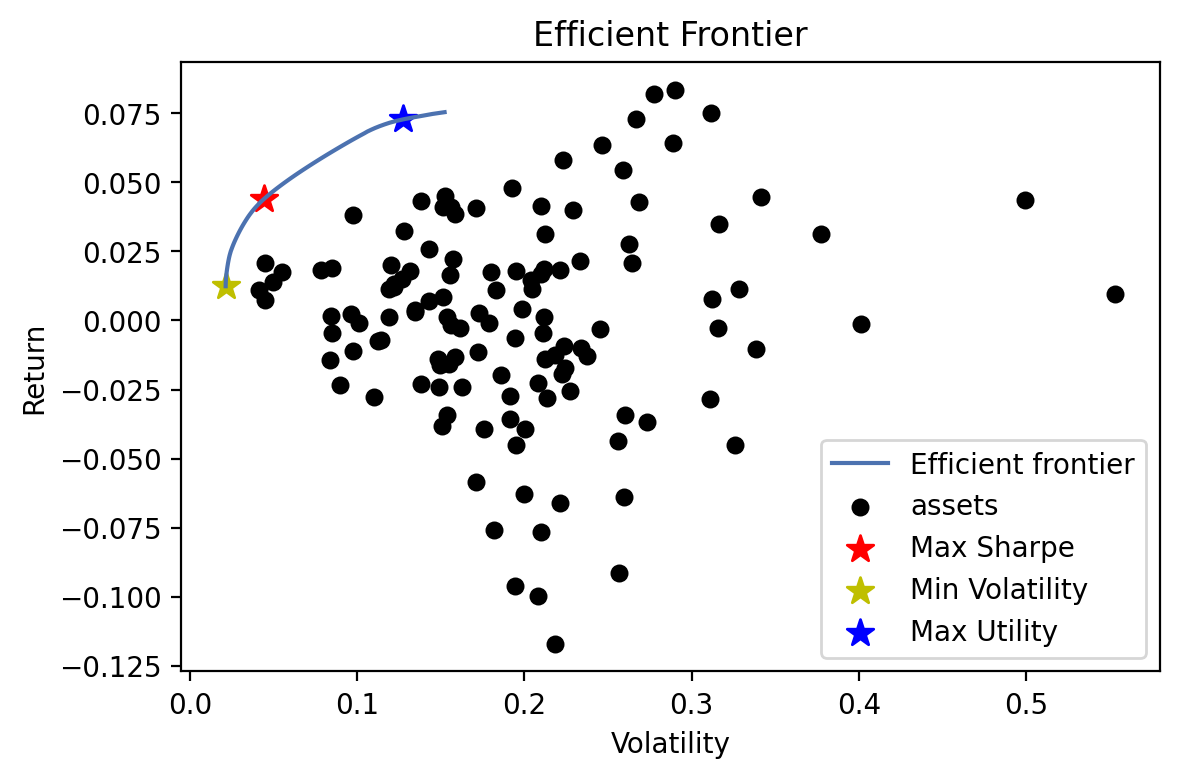

###### Efficient Frontier Based on Return Mean and Covariance Generated from Cosine Similarity Distances

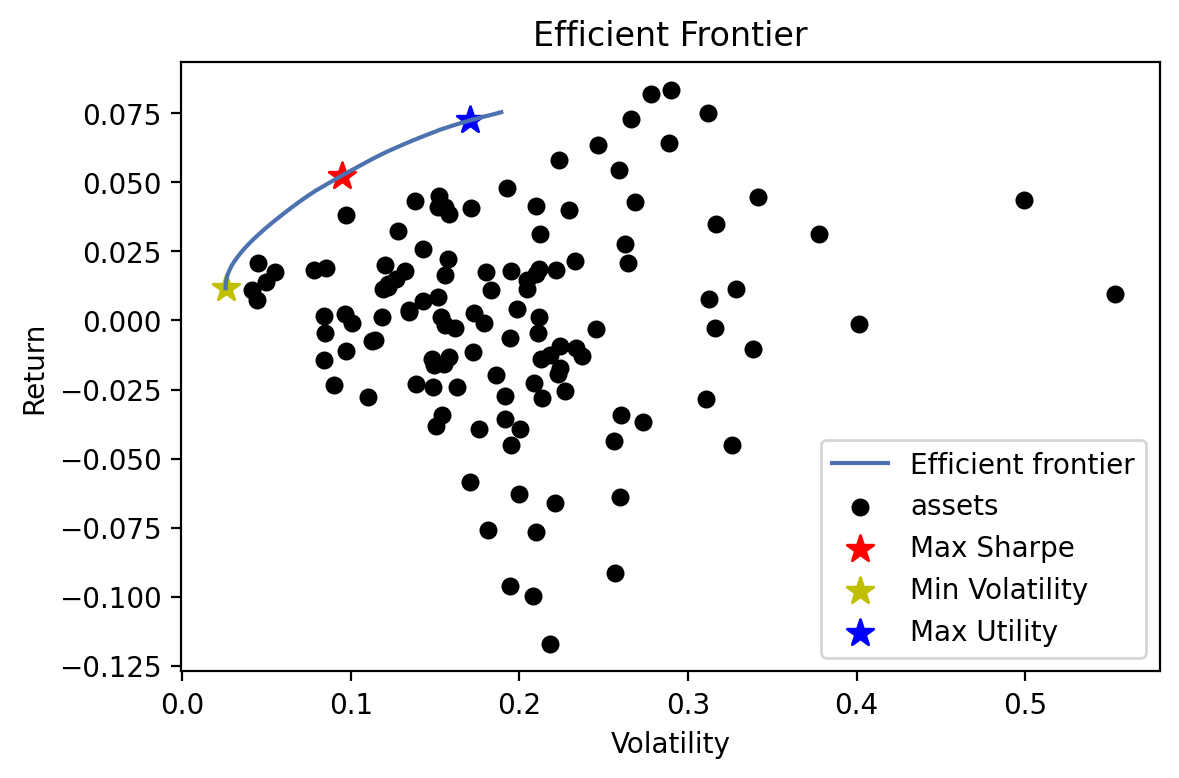

###### Max Utility
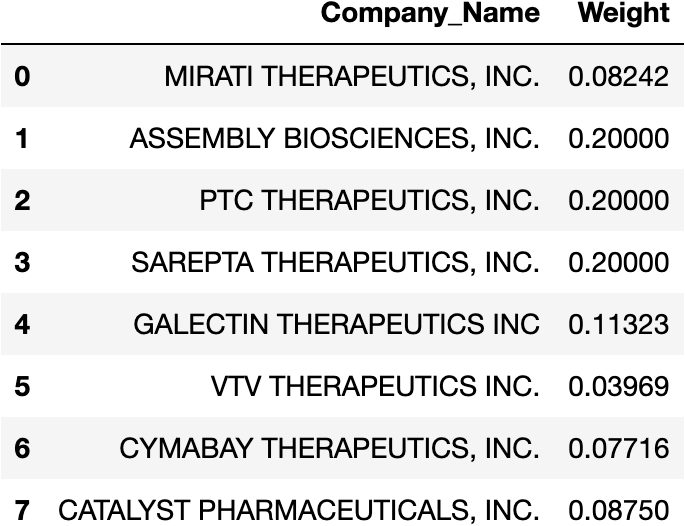

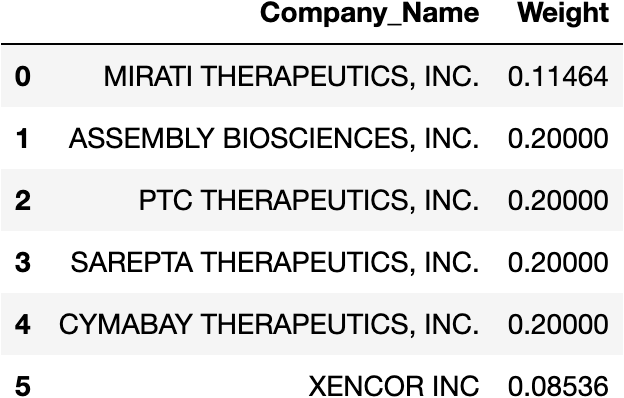

###### Max Sharpe Ratio

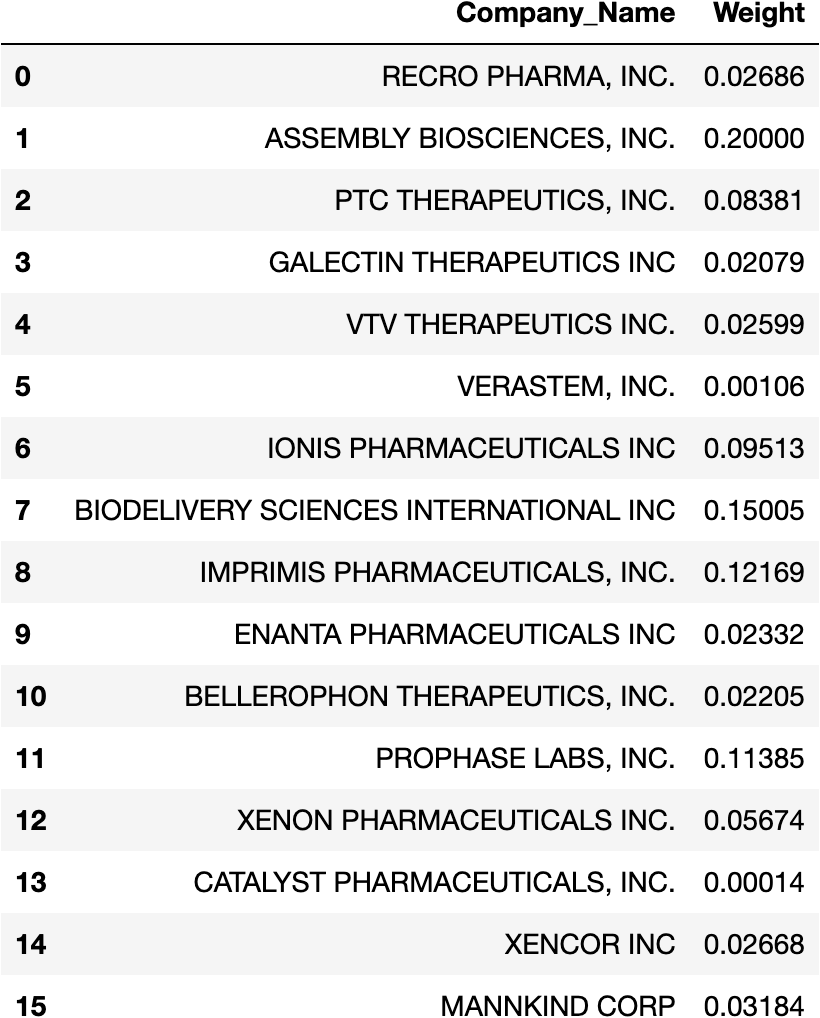

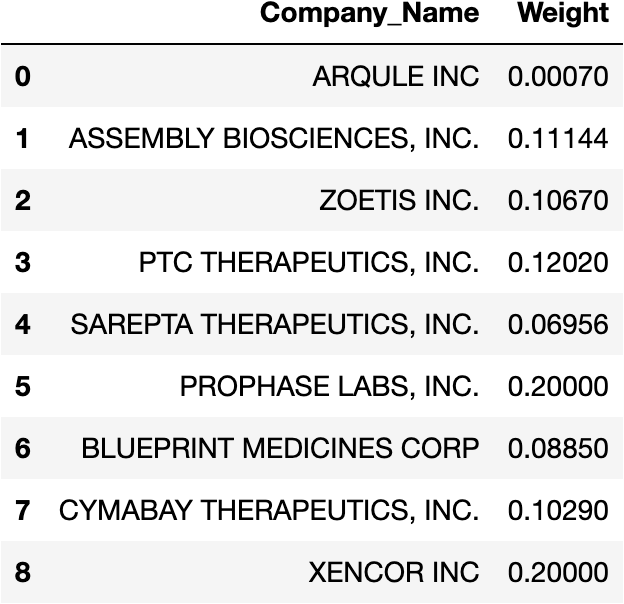

###### Min Volatility

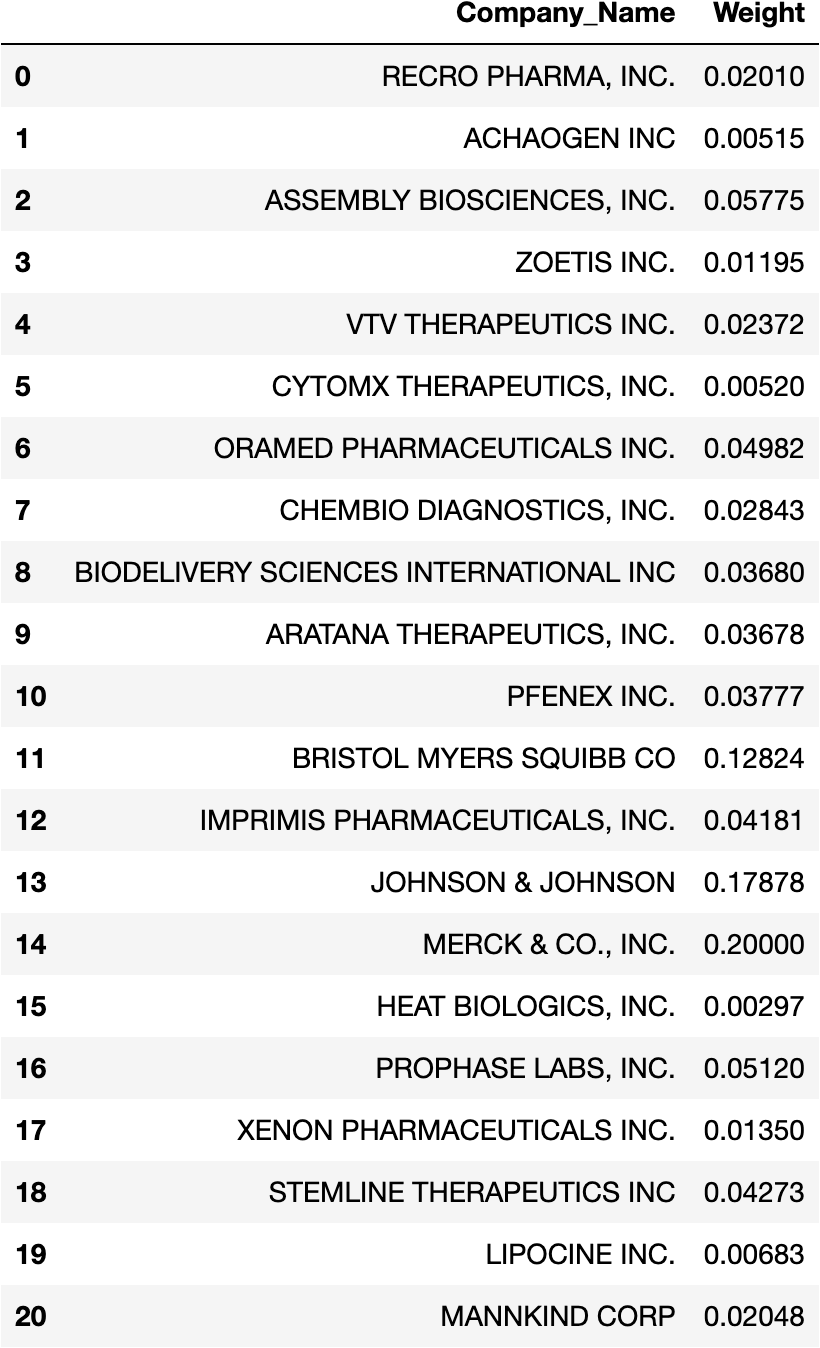

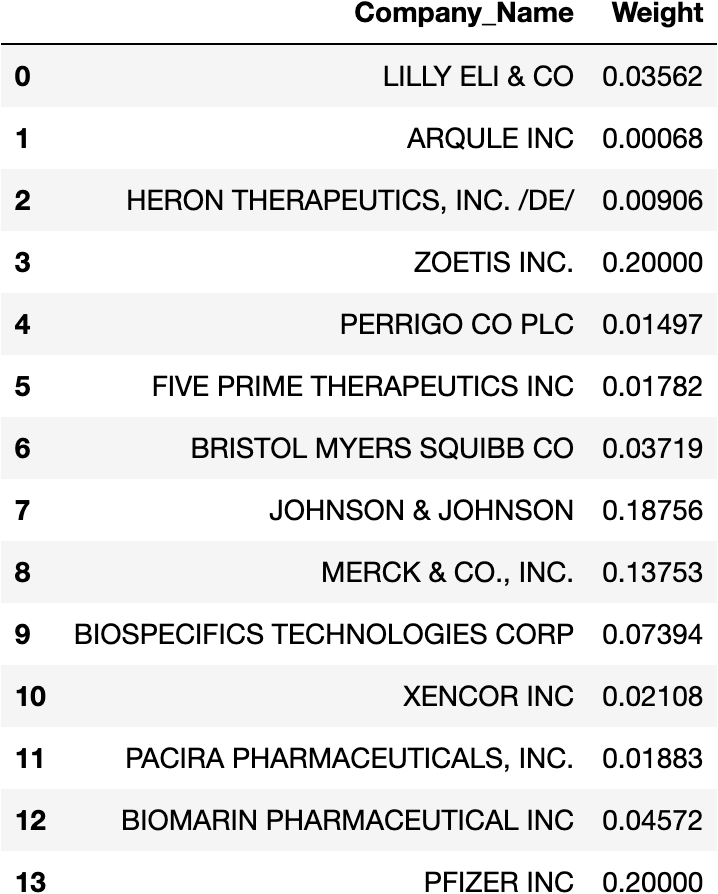

#### Evaluating Description Cosine Distance Similarity vs. Returns Correlation - Bartlett's Test of Sphericity

Bartlett’s Test of Sphericity compares an observed correlation matrix to the identity matrix. Essentially it checks to see if there is a certain redundancy between the variables that we can summarize with a few number of factors. 

The null hypothesis of the test is that the variables are orthogonal, i.e. not correlated and the correlation matrix does not diverge significantly from the identity matrix. 

Z = standardized nxp returns matrix (n observations & p companies)

S = description similarity matrix

1. Take Cholesky description of S, $ S = L \times L^T $
2. Transform data as $ X = Z \times (L^T)^-1$
3. Run Barlett's test of sphericity on Var(X)

$Var[X] = Var[Z × (L^⊤)^-1 ] =  ( (L^⊤)^-1  )^⊤ Var[Z] (L^⊤)^-1 = L^-1 S (L^⊤)^-1 = L^-1 (L× L^⊤) (L^⊤)^-1 = I $

If the cosine similarity matrix is close to the returns correlation matrix, then Var(X) should be spherical (ie. equals to identity matrix). 

In [54]:
import scipy.linalg  
Z = pd.read_csv("mary/standardized_returns_matrix.csv", index_col=0)
S = pd.read_csv("mary/description_distance_similarity_matrix.csv", index_col=0)
# step 1
L = scipy.linalg.cholesky(S.iloc[:45,:45], lower=True)
#step 2
X = np.matmul(Z.iloc[:,:45],scipy.linalg.inv(L))

In [55]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#step 3
chi_square_value,p_value=calculate_bartlett_sphericity(np.cov(X.T))
chi_square_value, p_value

(4917.637167624206, 0.0)

p-value $\approx$ 0 so the test was statistically significant and we reject the null hypothesis. This indicates that the variables are not orthogonal and the cosine similarity matrix is not close to the returns correlation matrix

## Citations
